# Predictions:
#### Average Annual Temperature  in degree Celsius and CO2 emissions anually if no proper action is taken against greenhouse emissions in india
#### Sources of these data along with compiled dataset will be uploaded on my kaggle account  or github, id:jagan028
#### Model used: Polynomial Regressor

In [1]:
#Importing necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df=pd.read_csv("CO2vsTemp.csv")

In [3]:
df

,Year,Entity,Annual CO2 emissions,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,India,13196136,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,India,14533836,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,India,14820573,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,India,16581390,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,India,16951603,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,India,2036937081,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,India,2185855918,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,India,2268567478,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,India,2382223220,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


# Annual CO2 emissions vs Year

In [4]:
X=df.iloc[:,0:1].values
Y=df.iloc[:,2:3].values

In [5]:
print(np.concatenate((X,Y),axis=1))

[[      1901   13196136]
 [      1902   14533836]
 [      1903   14820573]
 [      1904   16581390]
 [      1905   16951603]
 [      1906   19573686]
 [      1907   21800057]
 [      1908   24939921]
 [      1909   24172097]
 [      1910   23517201]
 [      1911   24813992]
 [      1912   28557928]
 [      1913   31506969]
 [      1914   31738989]
 [      1915   33184154]
 [      1916   33560310]
 [      1917   35064951]
 [      1918   39410722]
 [      1919   43030891]
 [      1920   34912536]
 [      1921   37553406]
 [      1922   36950533]
 [      1923   38020655]
 [      1924   40680490]
 [      1925   40136781]
 [      1926   39994677]
 [      1927   41938573]
 [      1928   40128884]
 [      1929   41765975]
 [      1930   42458548]
 [      1931   38904895]
 [      1932   36179469]
 [      1933   35516433]
 [      1934   39665751]
 [      1935   41450301]
 [      1936   40740574]
 [      1937   45129396]
 [      1938   50449974]
 [      1939   49381121]
 [      1940   52382436]


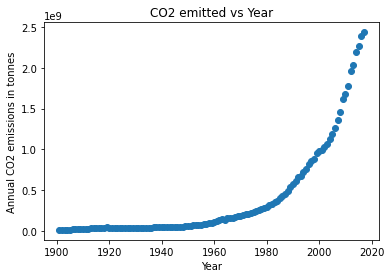

In [6]:
plt.scatter(X,Y)
plt.xlabel("Year")
plt.ylabel("Annual CO2 emissions in tonnes")
plt.title("CO2 emitted vs Year")
plt.show()

In [7]:
poly=PolynomialFeatures(degree=6)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
X_poly_train=poly.fit_transform(X_train)
X_poly_test=poly.transform(X_test)
polyreg=LinearRegression()
polyreg.fit(X_poly_train,Y_train)

LinearRegression()

In [8]:
polyreg.score(X_poly_test,Y_test)

0.9855938515904087

In [9]:
x=np.arange(min(X)-20,max(X)+20,step=0.5)
x_poly=poly.transform(np.array(x).reshape(len(x),1))
y=polyreg.predict(x_poly)

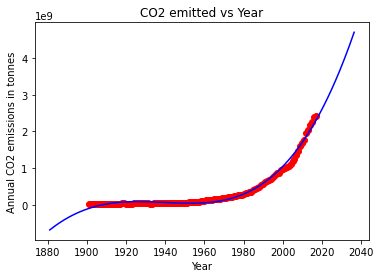

In [10]:
plt.plot(x,y,color="blue")
plt.scatter(X,Y,color="red")
plt.xlabel("Year")
plt.ylabel("Annual CO2 emissions in tonnes")
plt.title("CO2 emitted vs Year")
plt.show()

### Thus we can consider our model to be a success as it has 99% accuracy, Drawback being that this is a highly overfitted data and CO2 emissions will actually flatten as time progresses.
### Predicting CO2 emissions for a single year:

In [11]:
year=int(input("Enter Year: "))
year_poly=poly.transform([[year]])
CO2=polyreg.predict(year_poly)
print("The Estimated CO2 Emission in tonnes for the year ",year," is ",CO2[0][0])

Enter Year: 2043
The Estimated CO2 Emission in tonnes for the year  2043  is  5781519107.880127
